In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

data = pd.read_csv('Hackathon_Working_Data.csv')


In [2]:
# Display the first few rows of the dataset
print(data.head())


  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL  
1             

In [3]:
# Summary statistics of numerical columns
print(data.describe())

                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


In [4]:
# Check for missing values
print(data.isnull().sum())


MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [5]:
# Check for duplicate rows
print("Duplicate rows:", data.duplicated().sum())


Duplicate rows: 90


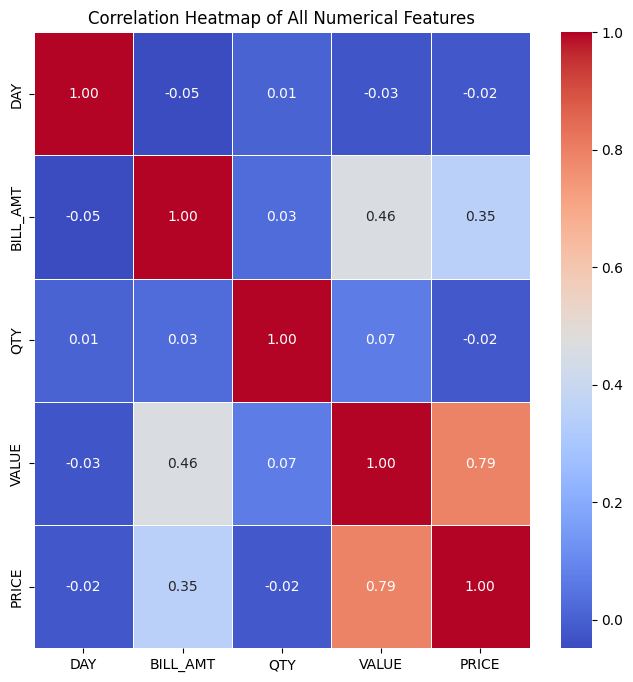

In [6]:
# Exclude non-numeric columns from the correlation matrix computation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Numerical Features')
plt.show()

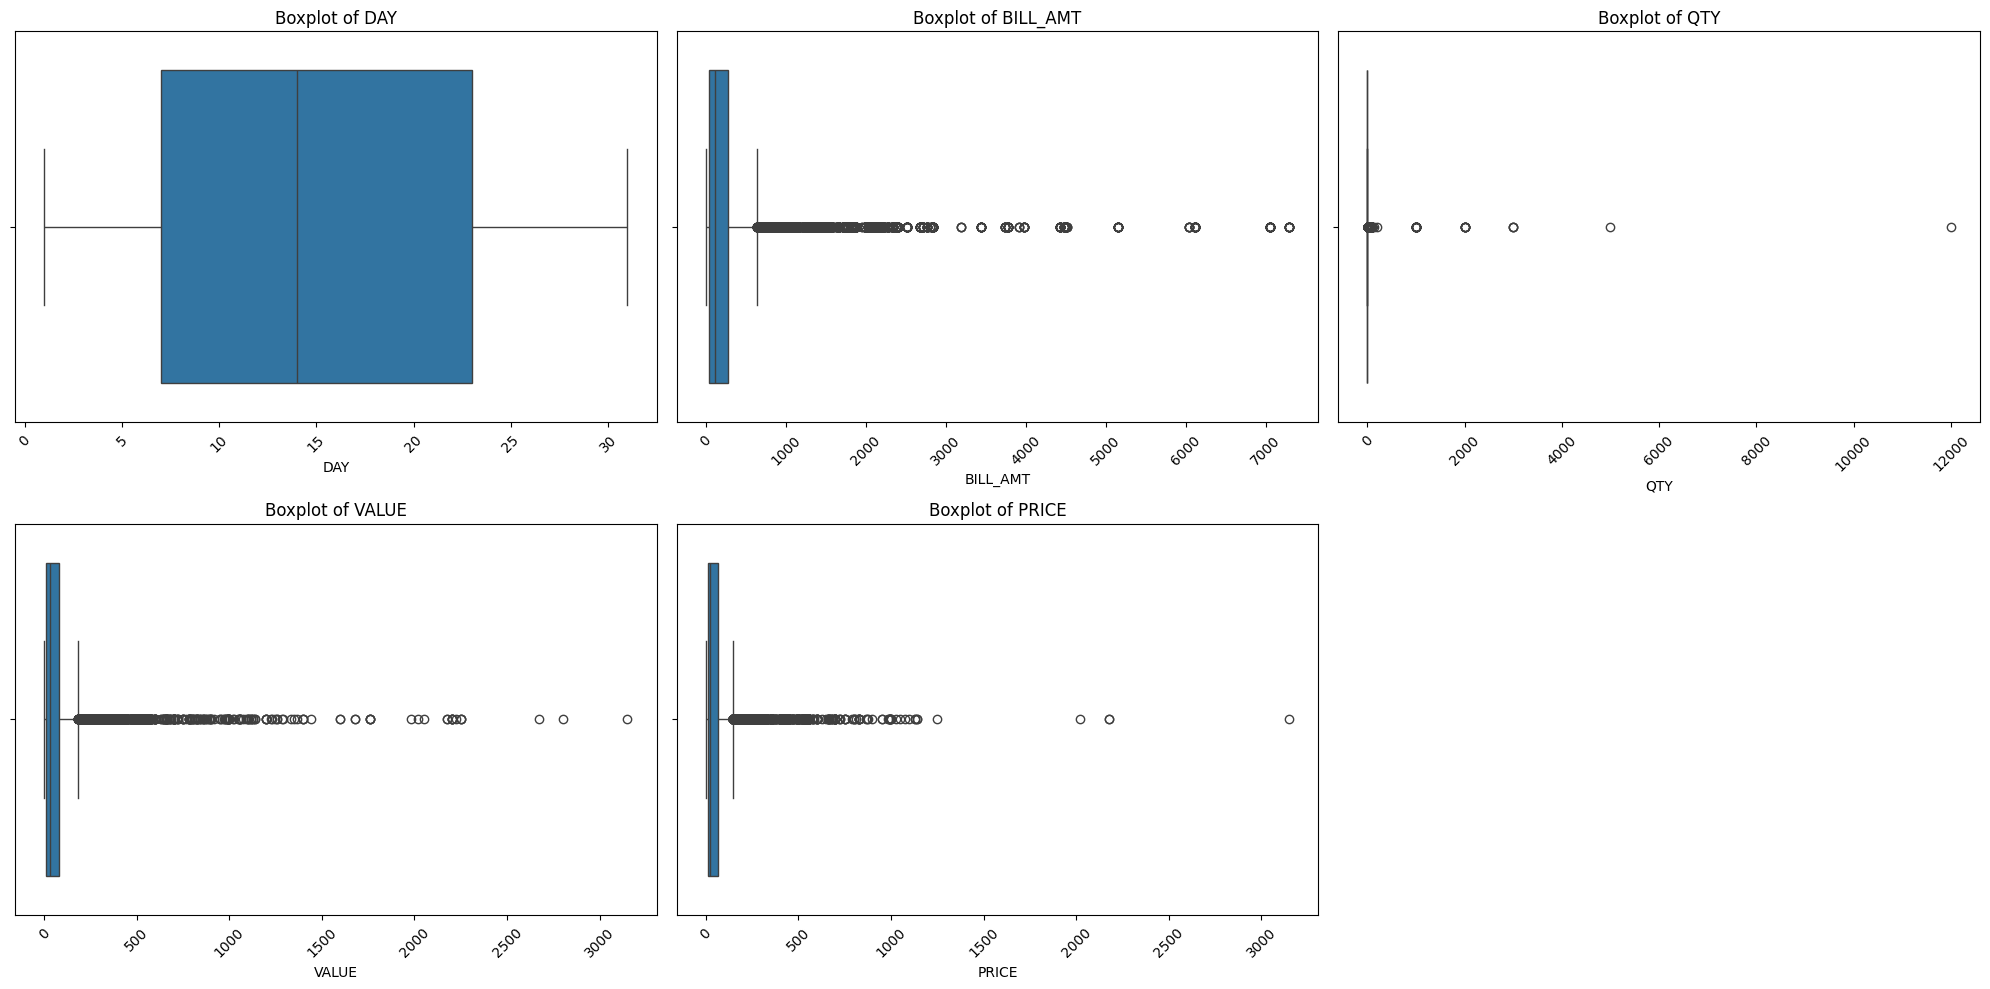

In [7]:
# Identify numerical columns dynamically
numerical_cols = data.select_dtypes(include=np.number).columns

# Set up the figure and axis
plt.figure(figsize=(20, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, len(numerical_cols)//2 + 1, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


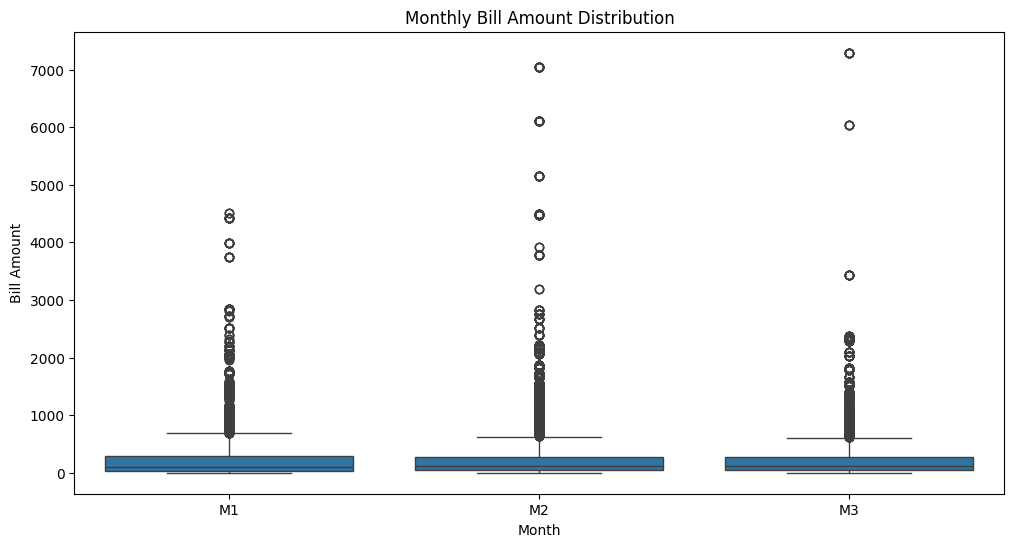

In [8]:
# Relationship between categorical and numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='MONTH', y='BILL_AMT', data=data)
plt.title('Monthly Bill Amount Distribution')
plt.xlabel('Month')
plt.ylabel('Bill Amount')
plt.show()

C:\Users\Anush Pranav\AppData\Local\Temp\ipykernel_17232\850936222.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='STORECODE', y='BILL_AMT', data=data, ci='sd')  # ci='sd' for standard deviation confidence intervals


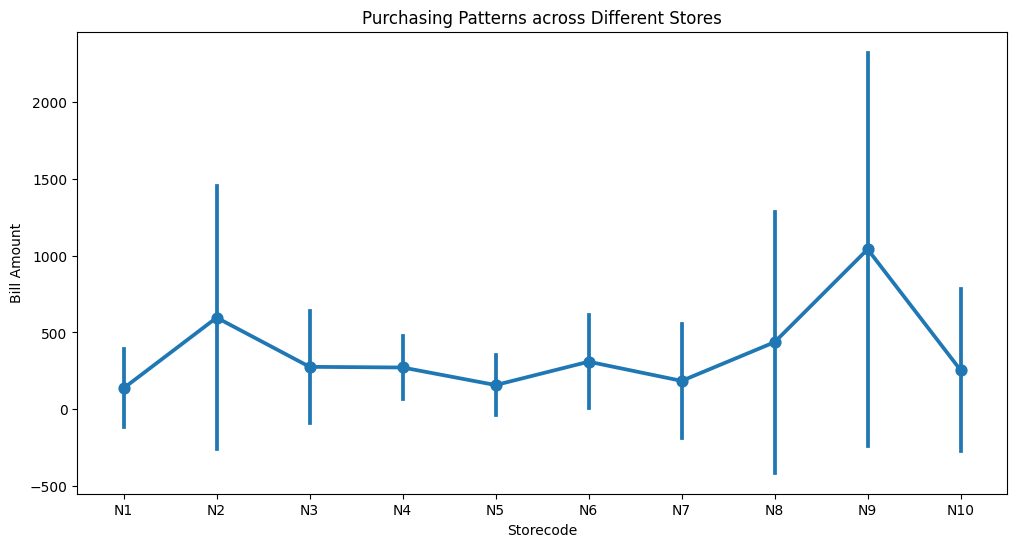

In [9]:
# Purchasing patterns across different stores - Using Point Plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='STORECODE', y='BILL_AMT', data=data, ci='sd')  # ci='sd' for standard deviation confidence intervals
plt.title('Purchasing Patterns across Different Stores')
plt.xlabel('Storecode')
plt.ylabel('Bill Amount')
plt.show()


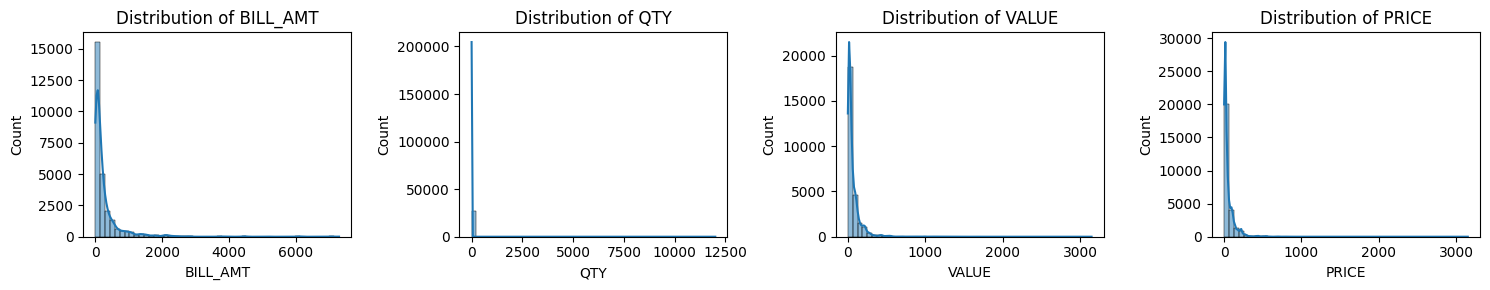

In [10]:
# Exploratory Data Analysis

# Distribution of numerical columns
numerical_cols = ['BILL_AMT', 'QTY', 'VALUE', 'PRICE']
plt.figure(figsize=(15, 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

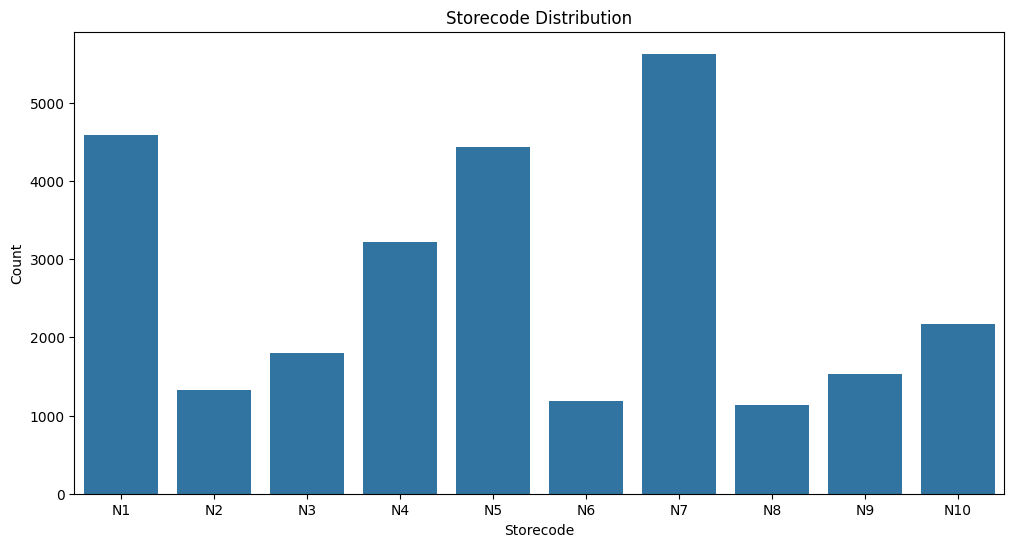

In [11]:
# Visualizing categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='STORECODE', data=data)
plt.title('Storecode Distribution')
plt.xlabel('Storecode')
plt.ylabel('Count')
plt.show()


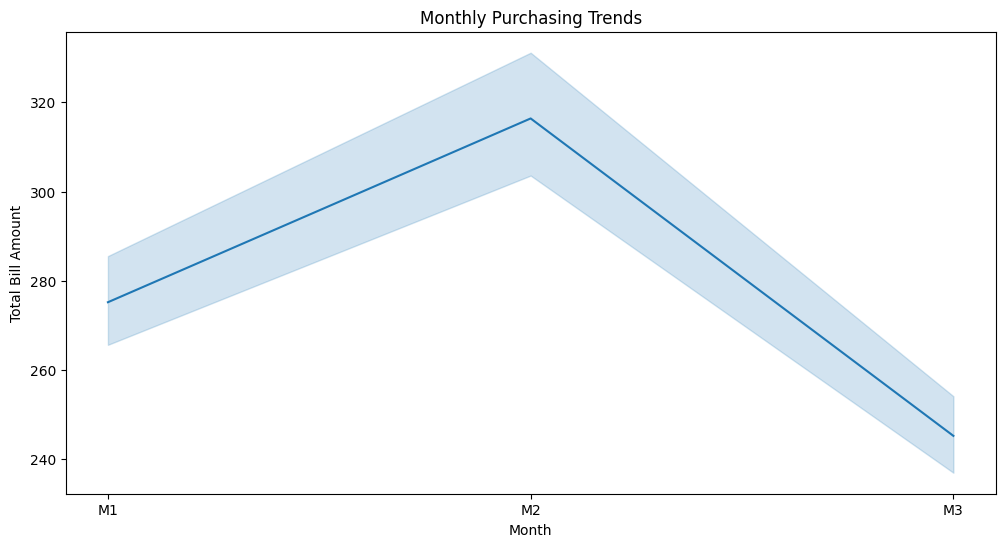

In [12]:
# Analyzing customer behavior patterns
# Monthly purchasing trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='BILL_AMT', data=data)
plt.title('Monthly Purchasing Trends')
plt.xlabel('Month')
plt.ylabel('Total Bill Amount')
plt.show()

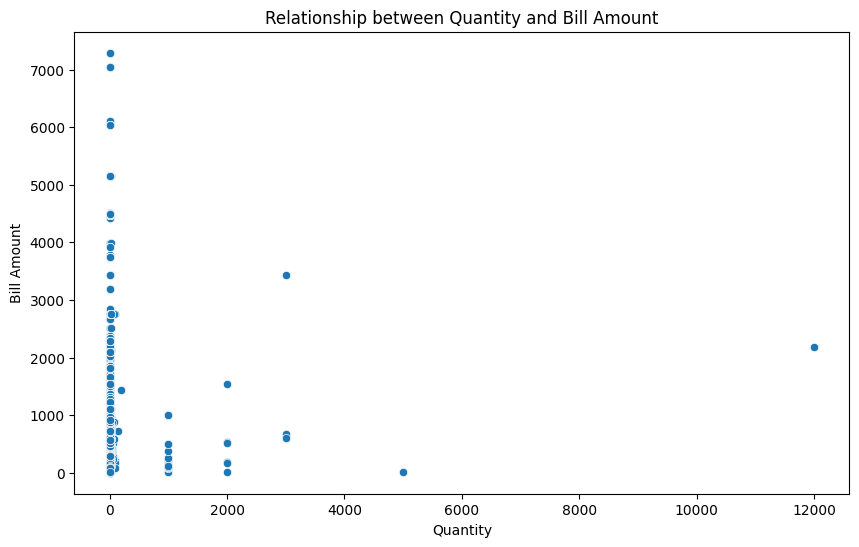

In [13]:
# Relationship between bill amount and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QTY', y='BILL_AMT', data=data)
plt.title('Relationship between Quantity and Bill Amount')
plt.xlabel('Quantity')
plt.ylabel('Bill Amount')
plt.show()

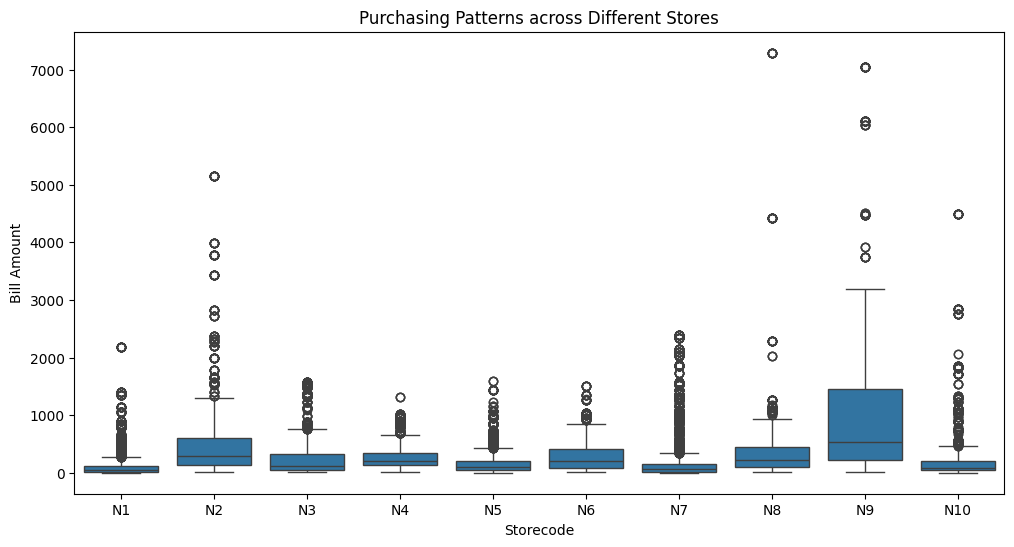

In [14]:
# Purchasing patterns across different stores
plt.figure(figsize=(12, 6))
sns.boxplot(x='STORECODE', y='BILL_AMT', data=data)
plt.title('Purchasing Patterns across Different Stores')
plt.xlabel('Storecode')
plt.ylabel('Bill Amount')
plt.show()

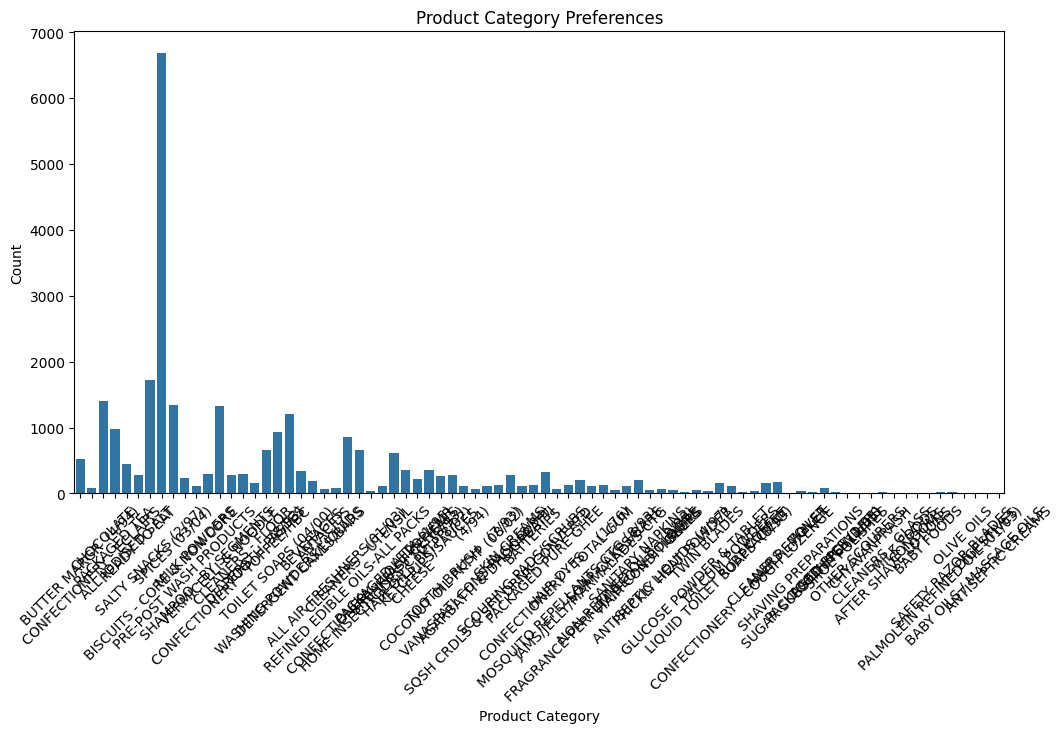

C:\Users\Anush Pranav\AppData\Local\Temp\ipykernel_17232\272346035.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


       antecedents      consequents  antecedent support  consequent support  \
0          (CREAM)  (SWEET/COOKIES)            0.171077            0.219022   
1  (SWEET/COOKIES)          (CREAM)            0.219022            0.171077   
2          (MARIE)  (SWEET/COOKIES)            0.145859            0.219022   
3  (SWEET/COOKIES)          (MARIE)            0.219022            0.145859   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.073007    0.426752  1.948438  0.035538    1.362372       0.587230  
1  0.073007    0.333333  1.948438  0.035538    1.243384       0.623281  
2  0.058219    0.399146  1.822399  0.026273    1.299780       0.528335  
3  0.058219    0.265814  1.822399  0.026273    1.163384       0.577831  


C:\Users\Anush Pranav\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
# Product Preferences

# Visualizing product preferences
plt.figure(figsize=(12, 6))
sns.countplot(x='GRP', data=data)
plt.title('Product Category Preferences')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Basket Analysis

# Finding associations between products frequently purchased together
# Assuming 'BILL_ID' as the transaction identifier and 'SSGRP' as product subcategory
basket = data.groupby(['BILL_ID', 'SSGRP'])['QTY'].sum().unstack().reset_index().fillna(0).set_index('BILL_ID')
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.head())


